In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
import seaborn as sns
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

- https://raw.githubusercontent.com/rickiepark/hg-mldl/master/wine.csv


In [2]:
wine = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/wine.csv')
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
wine['class'].value_counts()

1.0    4898
0.0    1599
Name: class, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
wine_input = wine.iloc[:,:-1].to_numpy()
wine_target = wine.iloc[:,-1].to_numpy()

In [8]:
train_input , test_input , train_target , test_target = train_test_split(wine_input , wine_target , random_state = 42 , test_size = 0.3 , stratify = wine_target)

In [9]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
ss = StandardScaler()
ss.fit(train_input)

StandardScaler()

In [10]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# KNN 모델 구축

In [11]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_scaled , train_target)
print(kn.score(train_scaled , train_target))
print(kn.score(test_scaled , test_target))

0.9030129755883
0.841025641025641


In [12]:
print(kn.score(train_scaled , train_target))
print(kn.score(test_scaled , test_target))

0.9030129755883
0.841025641025641


In [13]:
train = []
test = []

for i in range(1,100,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_scaled , train_target)
    train.append(knn.score(train_scaled , train_target))
    test.append(knn.score(test_scaled , test_target))

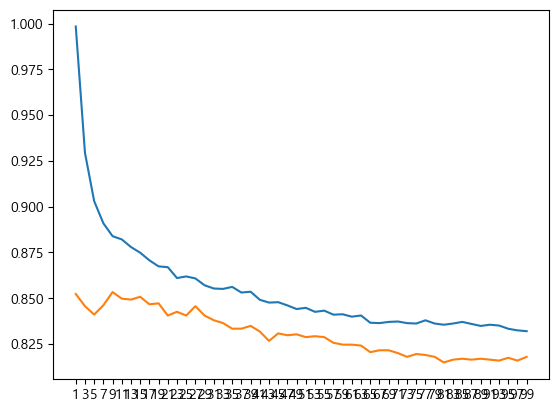

In [14]:
plt.plot(train)
plt.plot(test)
plt.xticks(np.arange(50) , np.arange(1,100,2))
plt.show()

In [15]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 9)
kn.fit(train_scaled , train_target)
print(kn.score(train_scaled , train_target))
print(kn.score(test_scaled , test_target))

0.883879480976468
0.8533333333333334


# 로지스틱 회귀 모델 구축

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled , train_target)
print(lr.score(train_scaled , train_target))
print(lr.score(test_scaled , test_target))

0.7842533538596878
0.7758974358974359


- 과소적합

In [19]:
train = []
test = []

for i in range(1,100):
    lrr = LogisticRegression(C = i)
    lrr.fit(train_scaled , train_target)
    train.append(lrr.score(train_scaled , train_target))
    test.append(lrr.score(test_scaled , test_target))

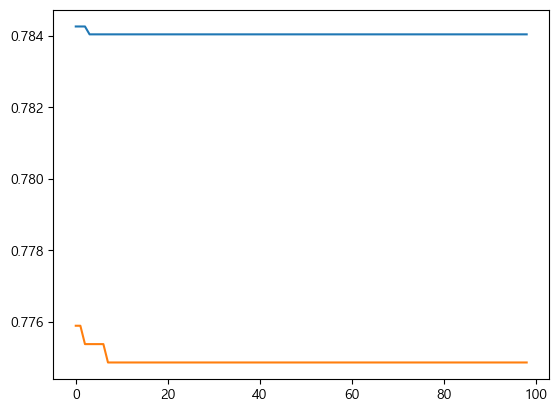

In [20]:
plt.plot(train)
plt.plot(test)
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 100)
lr.fit(train_scaled , train_target)
print(lr.score(train_scaled , train_target))
print(lr.score(test_scaled , test_target))

0.7842533538596878
0.7758974358974359


In [22]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , roc_auc_score , f1_score , confusion_matrix , roc_curve , precision_recall_curve

In [23]:
pred = lr.predict(test_scaled)
pred_proba = lr.predict_proba(test_scaled)

In [24]:
def confusion(real , pred , pred_proba = None):
    confusion = confusion_matrix(real , pred)
    accuracy = accuracy_score(real , pred)
    precision = precision_score(real , pred)
    recall = recall_score(real , pred)
    f1 = f1_score(real , pred)
    auc = roc_auc_score(real , pred_proba)
    df = pd.DataFrame(confusion, index=['실제값(N)', '실제값(P)'], columns=['예측값(N)', '예측값(P)'])
    
    print(f'혼동행렬\n{df}\n\n 정확도 : {accuracy:.4f} , 정밀도 : {precision:.4f} , 재현율 : {recall:.4f} , f1스코어 : {f1:.4f} , auc점수 : {auc:.4f}')

In [25]:
confusion(test_target , pred , pred_proba[:,1])

혼동행렬
        예측값(N)  예측값(P)
실제값(N)     176     304
실제값(P)     133    1337

 정확도 : 0.7759 , 정밀도 : 0.8147 , 재현율 : 0.9095 , f1스코어 : 0.8595 , auc점수 : 0.8235


In [26]:
def prc(real , pred):
    precisions , recalls , thresholds = precision_recall_curve(real , pred)
    
    plt.figure(figsize = (10,10))
    boundary = thresholds.shape[0]
    plt.plot(thresholds , precisions[0:boundary] , ls= '--' , label = 'precision')
    plt.plot(thresholds , recalls[0:boundary] , label = 'recall')
    start , end = plt.xlim()
    plt.xticks(np.round(np.arange(start , end , 0.1) , 2))
    plt.xlabel('threshold value')
    plt.ylabel('precision and recall')
    plt.legend(loc = 'lower center')
    plt.grid()
    plt.show()

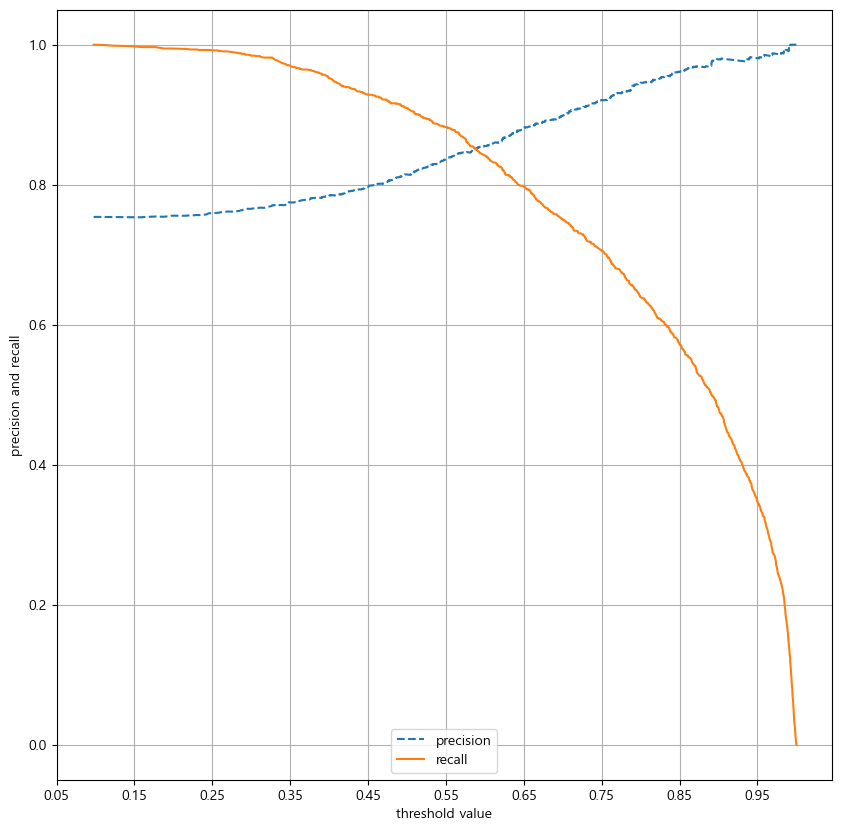

In [27]:
prc(test_target , pred_proba[:,1])

In [28]:
cut_off = [0.47,0.5,0.53,0.56,0.58,0.61,0.64]

for i in cut_off:
    #확률값이 cut보다 크면 1 , 아니면 0
    y_pred = np.where(pred_proba[:,1]>i , 1 , 0)
    acc = accuracy_score(test_target , y_pred)
    recall = recall_score(test_target , y_pred)
    precision = precision_score(test_target , y_pred)
    f1 = f1_score(test_target , y_pred)
    print(f'임계값 : {i}')
    print(f'정확도 : {acc:.4f}\n정밀도 : {precision:.4f}\n재현율 : {recall:.4f}\nf1스코어 : {f1:.4f}')
    print()
    print()

임계값 : 0.47
정확도 : 0.7703
정밀도 : 0.8027
재현율 : 0.9218
f1스코어 : 0.8581


임계값 : 0.5
정확도 : 0.7759
정밀도 : 0.8147
재현율 : 0.9095
f1스코어 : 0.8595


임계값 : 0.53
정확도 : 0.7785
정밀도 : 0.8277
재현율 : 0.8918
f1스코어 : 0.8585


임계값 : 0.56
정확도 : 0.7836
정밀도 : 0.8416
재현율 : 0.8782
f1스코어 : 0.8595


임계값 : 0.58
정확도 : 0.7744
정밀도 : 0.8461
재현율 : 0.8565
f1스코어 : 0.8513


임계값 : 0.61
정확도 : 0.7703
정밀도 : 0.8588
재현율 : 0.8320
f1스코어 : 0.8452


임계값 : 0.64
정확도 : 0.7656
정밀도 : 0.8755
재현율 : 0.8034
f1스코어 : 0.8379




- 임계값의 기본값 : 0.5 , threshold = 0.5인 곳에서 f1 score가 제일 높고 , 재현율 또한 동f1 기준 제일 높음

In [29]:
lr.coef_ , lr.intercept_

(array([[ 0.57393342,  1.68911236, -0.70340581]]), array([1.79674144]))

In [75]:
fper , tper , thresholds = roc_curve(test_target , lr.predict(test_scaled))

ValueError: multiclass format is not supported

In [79]:
test_target

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

# 의사결정나무 ( Decision Tree )
 - 의사결정나무의 가장 큰 단점은 과적합으로 인해 정확도가 떨어질 수 있다.

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt = DecisionTreeClassifier()
dt.fit(train_scaled , train_target)

DecisionTreeClassifier()

In [32]:
dt.score(train_scaled , train_target)

0.9984605234220365

In [33]:
dt.score(test_scaled , test_target)

0.8651282051282051

In [34]:
dt2 = DecisionTreeClassifier()
dt2.fit(train_input , train_target)
print(dt2.score(train_input , train_target))
print(dt2.score(test_input , test_target))

0.9984605234220365
0.8635897435897436


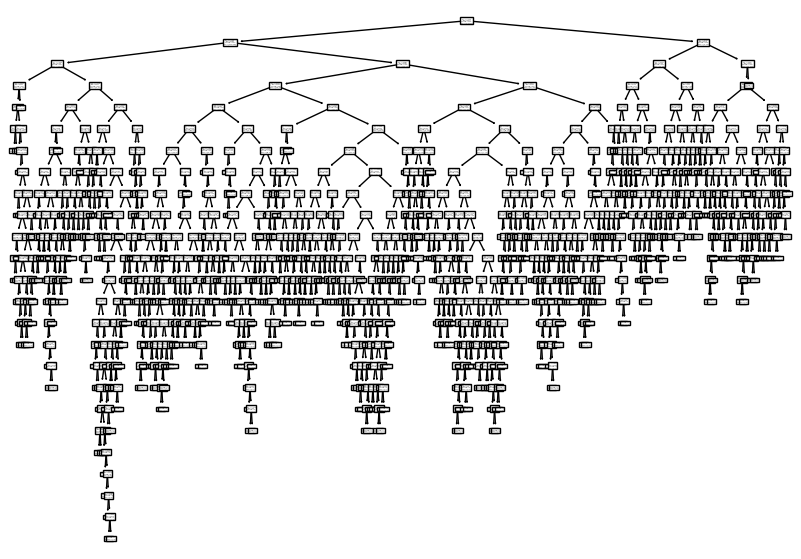

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize = (10,7))
plot_tree(dt)
plt.show()

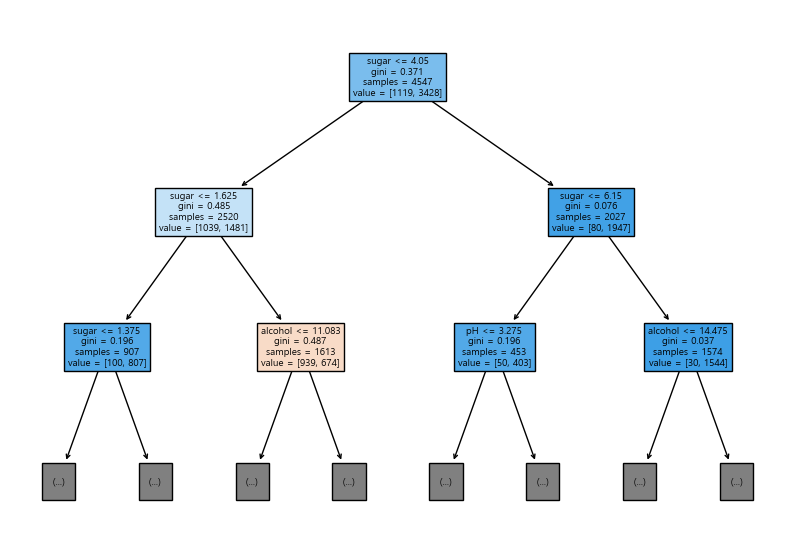

In [36]:
plt.figure(figsize = (10,7))
plot_tree(dt2 , max_depth = 2 , filled = True , feature_names = ['alcohol','sugar','pH'])
plt.show()

## 불순도
 - criterion 매개변수 지정 ( 기본값 gini와  entropy)
## 정보이득
 - 부모 노드와 자식 노드 사이의 불순도 차이
## 가지치기
 - 최대 트리로 형성된 결정트리의 특정 노드 밑의 트리를 제거하여 일반화 성능을 높임.
 - 과적합을 막기 위해서 사용.
 - 더 많은 가지가 생기지 않도록 트리의 깊이(max_depth) , leaf 노드의 최대 개수(min_samples_leaf) , 한 노드가 분할하기 위한 최소 데이터의 수를 제한(min_samples_split)

In [37]:
dt2 = DecisionTreeClassifier(max_depth = 3)
dt2.fit(train_input , train_target)
print(dt2.score(train_input , train_target))
print(dt2.score(test_input , test_target))

0.8495711458104245
0.8415384615384616


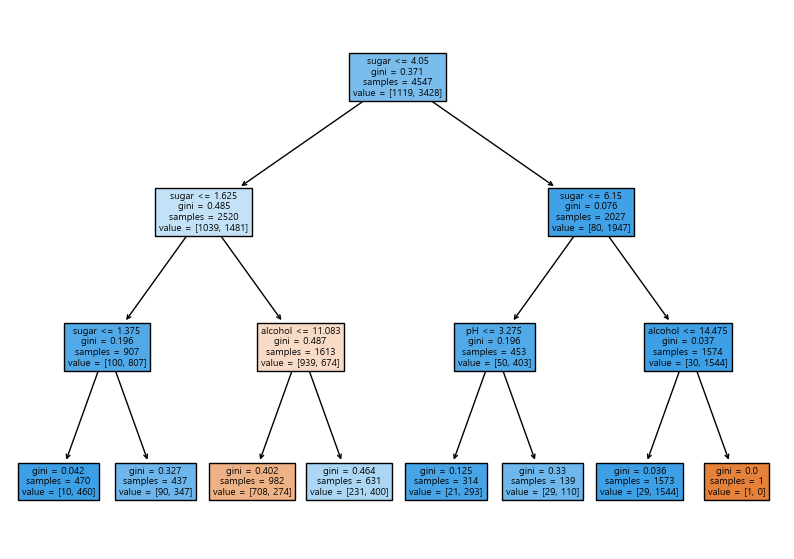

In [38]:
plt.figure(figsize = (10,7))
plot_tree(dt2 , filled = True , feature_names = ['alcohol','sugar','pH'])
plt.show()

In [39]:
dt2.feature_importances_

array([0.14205602, 0.85237058, 0.0055734 ])

# 확인학습
 - iris 데이터 분석

In [40]:
from sklearn.datasets import load_iris
iris = load_iris()

In [41]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [42]:
#테스트 데이터의 비율을 0.25로 나누기
from sklearn.model_selection import train_test_split
train_input , test_input , train_target , test_target = train_test_split(iris.data , iris.target , random_state = 42)

In [43]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [44]:
ss.fit(train_input)

StandardScaler()

In [45]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_scaled , train_target)
print(kn.score(train_scaled , train_target))
print(kn.score(test_scaled , test_target))

0.9642857142857143
1.0


- 과소적합이 일어났다고 판단해서 , 이웃 수를 조정해보기

In [47]:
for i in [1,3,5,7,9,11,13,15,17,19]:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_scaled , train_target)
    print('이웃 수 : ' , i)
    print(knn.score(train_scaled , train_target))
    print(knn.score(test_scaled , test_target))
    print()

이웃 수 :  1
1.0
1.0

이웃 수 :  3
0.9464285714285714
1.0

이웃 수 :  5
0.9642857142857143
1.0

이웃 수 :  7
0.9642857142857143
1.0

이웃 수 :  9
0.9464285714285714
1.0

이웃 수 :  11
0.9553571428571429
1.0

이웃 수 :  13
0.9464285714285714
1.0

이웃 수 :  15
0.9375
1.0

이웃 수 :  17
0.9375
1.0

이웃 수 :  19
0.9375
1.0



In [48]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , roc_auc_score , f1_score , confusion_matrix , roc_curve , precision_recall_curve

In [49]:
pred = kn.predict(test_scaled)

In [50]:
confusion_matrix(test_target , pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

- 잘못 분류한게 하나도 없다...

## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled , train_target)
print(lr.score(train_scaled , train_target))
print(lr.score(test_scaled , test_target))

0.9642857142857143
1.0


In [52]:
pred_proba = lr.predict_proba(test_scaled)

In [53]:
pred = lr.predict(test_scaled)

In [54]:
confusion_matrix(test_target , pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

- KNN 때와 똑같다.

In [55]:
train = []
test = []
for i in range(1,100):
    lrr = LogisticRegression(C = i)
    lrr.fit(train_scaled , train_target)
    train.append(lrr.score(train_scaled , train_target))
    test.append(lrr.score(test_scaled , test_target))

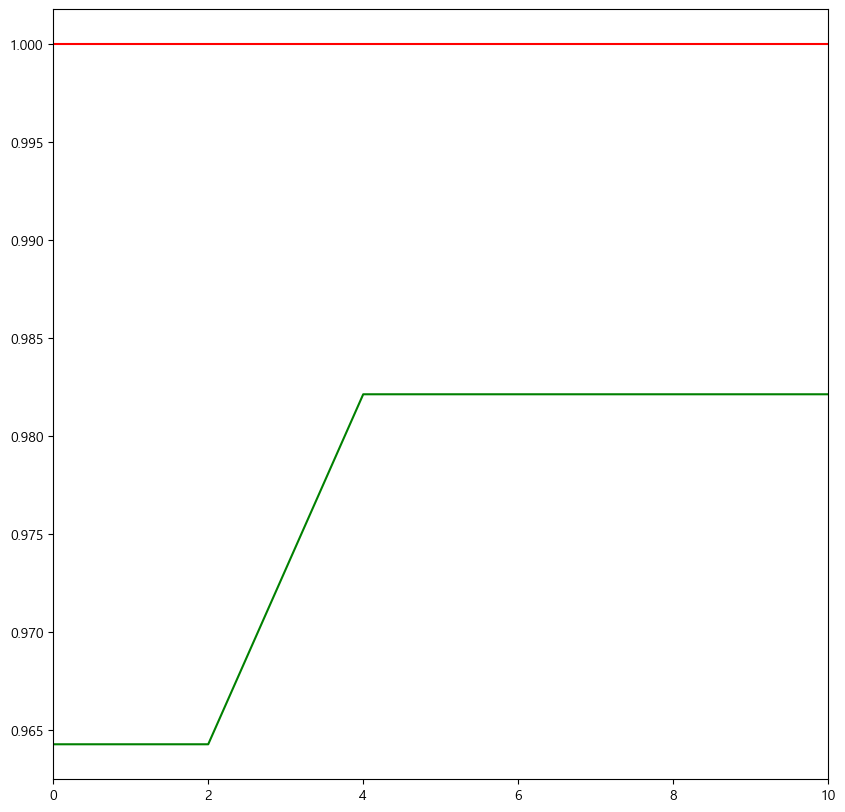

In [56]:
plt.figure(figsize = (10,10))
plt.plot(train , color = 'g' , label = 'train')
plt.plot(test , color = 'r' , label = 'test')
plt.xlim(0,10)
plt.show()

In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=5)
lr.fit(train_scaled , train_target)
print(lr.score(train_scaled , train_target))
print(lr.score(test_scaled , test_target))

0.9821428571428571
1.0


In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=5)
lr.fit(train_scaled , train_target)
print(lr.score(train_scaled , train_target))
print(lr.score(test_scaled , test_target))

0.9821428571428571
1.0


- 규제를 C = 5인 단계로 줄 때부터 , train 데이터의 점수가 0.982로 KNN보다 높게 나왔다.
- KNN의 최대값 : 0.9642
- LR 의 최대값 : 0.9821

## 의사결정나무

- 의사결정나무는 scale 안해도 됨.

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_input , train_target)
print(dt.score(train_input , train_target))
print(dt.score(test_input , test_target))

1.0
1.0


In [60]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

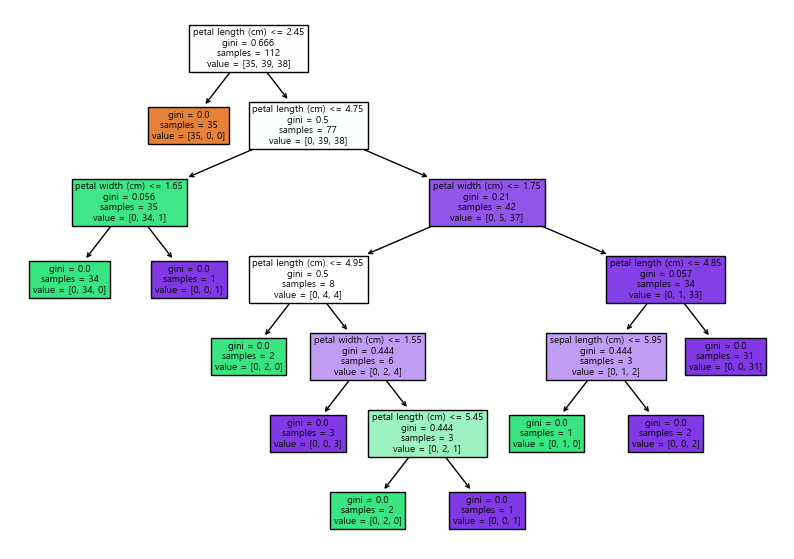

In [61]:
plt.figure(figsize = (10,7))
plot_tree(dt , filled = True , feature_names = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])
plt.show()

In [62]:
from sklearn.tree import export_graphviz

In [63]:
export_graphviz(dt , out_file = 'tree.dot' , class_names = iris.target_names , feature_names = iris.feature_names , impurity = True , filled = True)

In [64]:
import graphviz

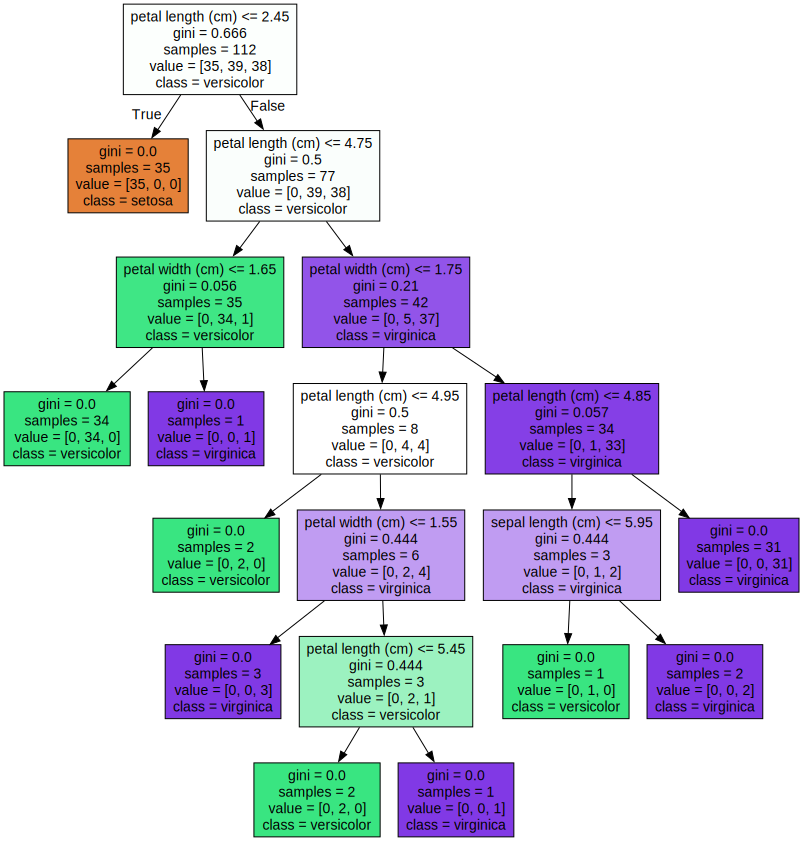

In [65]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 예측이 너무 잘되는데 , 데이터의 분포를 확인해보기

In [66]:
df = pd.DataFrame(iris.data , columns = iris.feature_names)

In [67]:
df['species'] = iris.target

In [68]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


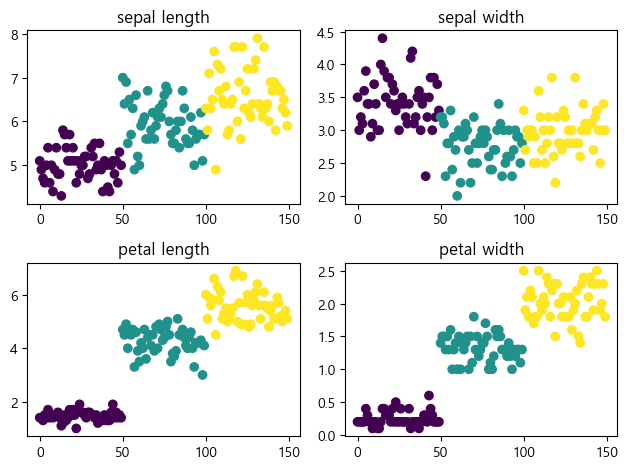

In [69]:
plt.subplot(2,2,1)
plt.scatter(x = np.arange(150) , y = df['sepal length (cm)'] , c = df['species'])
plt.title('sepal length')
plt.subplot(2,2,2)
plt.scatter(x = np.arange(150) , y = df['sepal width (cm)'] , c = df['species'])
plt.title('sepal width')
plt.subplot(2,2,3)
plt.scatter(x = np.arange(150) , y = df['petal length (cm)'] , c = df['species'])
plt.title('petal length')
plt.subplot(2,2,4)
plt.scatter(x = np.arange(150) , y = df['petal width (cm)'] , c = df['species'])
plt.title('petal width')
plt.tight_layout()
plt.show()

- 4개의 변수별로 분류가 잘 되어 있어서 잘되는것같다.

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_input , train_target)
print(dt.score(train_input , train_target))
print(dt.score(test_input , test_target))

1.0
1.0


# DecisionTree의 주요 하이퍼파라미터 조정

In [71]:
model = DecisionTreeClassifier(min_samples_split = 4)
model.fit(train_input , train_target)
print(model.score(train_input , train_target))
print(model.score(test_input , test_target))

0.9821428571428571
1.0


In [72]:
model.feature_importances_

array([0.        , 0.        , 0.41269774, 0.58730226])

In [73]:
for name , value in zip(iris.feature_names , model.feature_importances_):
    print(f'{name}의 중요도 : {value:.4f}')

sepal length (cm)의 중요도 : 0.0000
sepal width (cm)의 중요도 : 0.0000
petal length (cm)의 중요도 : 0.4127
petal width (cm)의 중요도 : 0.5873


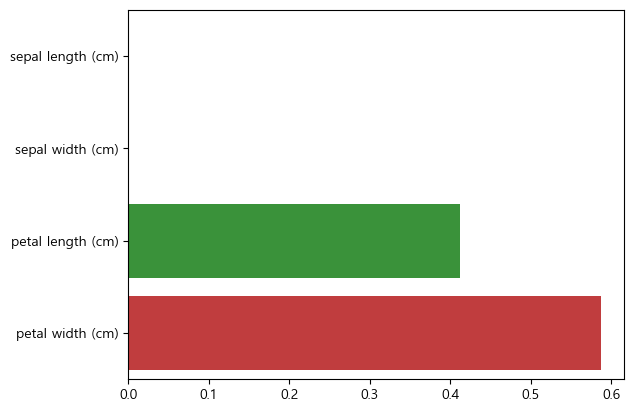

In [74]:
sns.barplot(x = model.feature_importances_ , y = iris.feature_names)
plt.show()